In [1]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/rasbt/python-machine-learning-book-3rd-edition/master/ch10/housing.data.txt', header=None, sep='\s+')

df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


# Description

this dataset contains information about houses in the suburbs of Boston

- CRIM: Per capita crime rate by town
- ZN: Proportion of residential land zoned for lots over 25,000 sq. ft.
- INDUS: Proportion of non-retail business acres per town
- CHAS: Charles River dummy variable (= 1 if tract bounds river and 0 otherwise)
- NOX: Nitric oxide concentration (parts per 10 million)
- RM: Average number of rooms per dwelling
- AGE: Proportion of owner-occupied units built prior to 1940
- DIS: Weighted distances to five Boston employment centers
- RAD: Index of accessibility to radial highways
- TAX: Full-value property tax rate per $10,000
- PTRATIO: Pupil-teacher ratio by town
- B: 1000(Bk – 0.63)^2, where Bk is the proportion of [people of African American descent] by town
- LSTAT: Percentage of lower status of the population
- MEDV: Median value of owner-occupied homes in $1000s

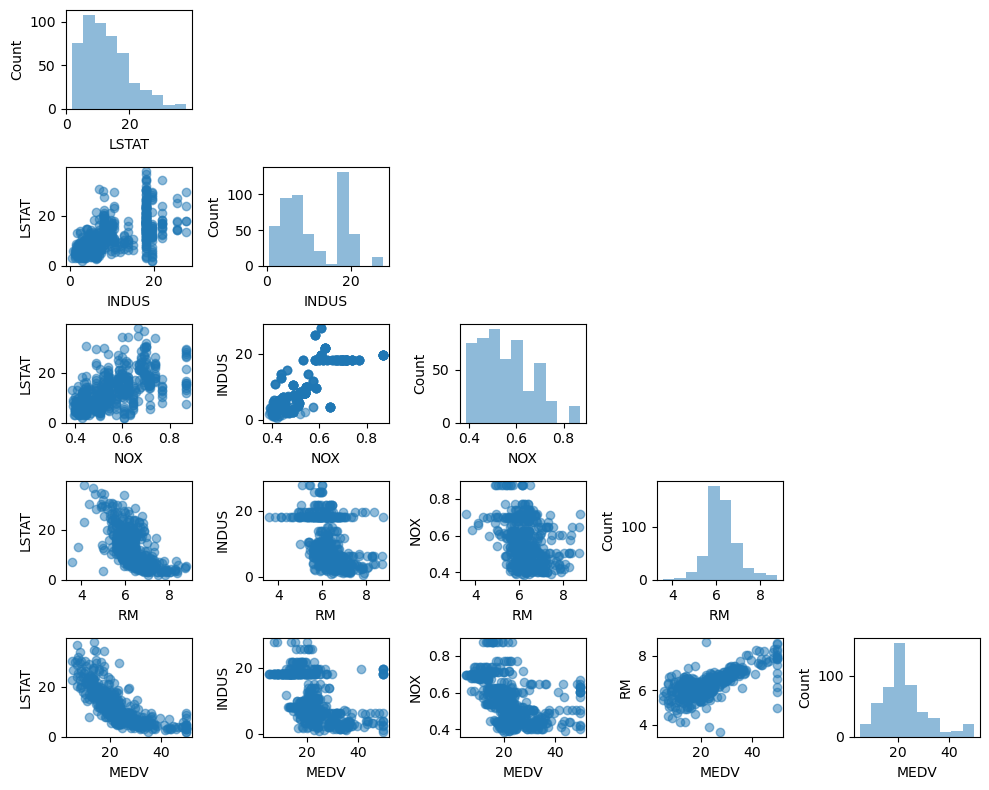

In [2]:
# important charactristics of a dataset
## exploratory data analysis (EDA)
### visualization

import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix

cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']

scatterplotmatrix(df[cols].values, figsize=(10, 8), names=cols, alpha=0.5)
plt.tight_layout()
plt.show()

so we can see that there is a relationship between RM and MEDV. (and ...). and also we can see that the MEDV variable seems to be normally distributed but
contains several outliers. (and and and ...)

In [3]:
df[cols].values.T.shape

(5, 506)

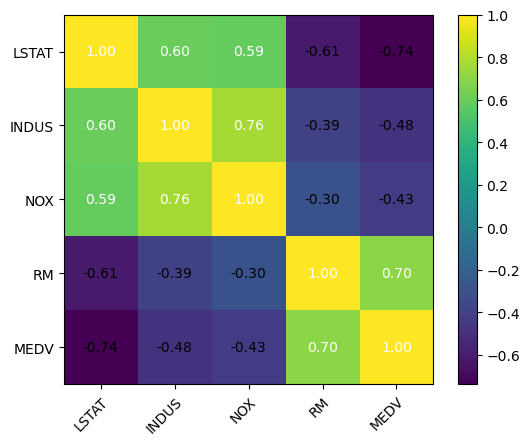

In [4]:
# looking at relationsships using a << correlation matrix >>

from mlxtend.plotting import heatmap
import numpy as np

cm = np.corrcoef(df[cols].values.T)
hm = heatmap(cm, row_names=cols, column_names=cols)

plt.show()

we can see that there are god rels between MEDV(target) and LSTAT, RM

but also if we remember, the relation between LSTAT and MEDV was non-linear. but at this point , we just want to apply **linear regression**

we are going to use least squares linear regression and solve it by using gradient descent

Text(0, 0.5, 'MEDV')

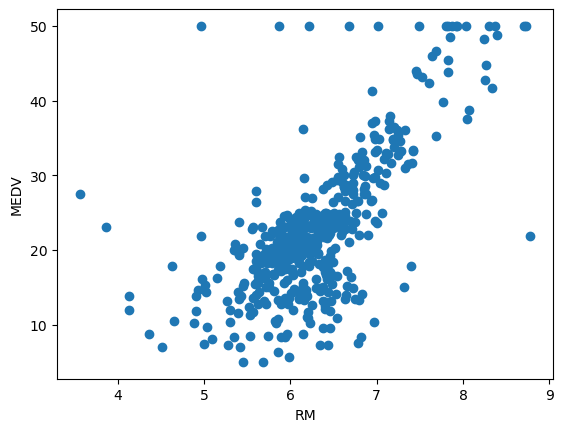

In [5]:
X = df[['RM']].values
y = df['MEDV'].values

plt.scatter(x=X, y=y)
plt.xlabel('RM')
plt.ylabel('MEDV')

In [6]:
# highly recommended to apply normalization 

from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
sc_y = StandardScaler()


X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten()

In [7]:
# our regression model

class LinearRegressionGD(object):
    def __init__(self, eta=0.001, n_iter=20):
        self.eta = eta  # learning rate
        self.n_iter = n_iter    # number of iteration

    def fit(self, X, y):
        self.w_ = np.zeros(X.shape[1] + 1)
        self.cost_ = []

        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (output - y)

            self.w_[0] -= self.eta * errors.sum()
            self.w_[1:] -= self.eta * np.dot(X.T, errors)

            cost = (errors**2).sum() / 2.0

            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return self.net_input(X)

In [8]:
model = LinearRegressionGD()

model.fit(X_std, y_std)

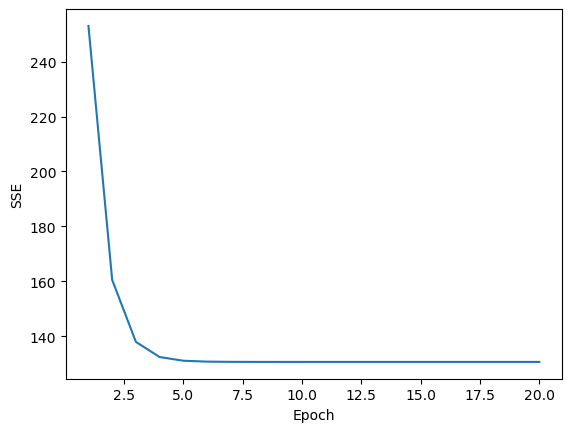

In [9]:
plt.plot(range(1, model.n_iter+1), model.cost_)
plt.ylabel('SSE')
plt.xlabel('Epoch')
plt.show()

In [10]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, edgecolors='white', c='steelblue', s=70)
    plt.plot(X, model.predict(X), color='black', lw=2)
    return None

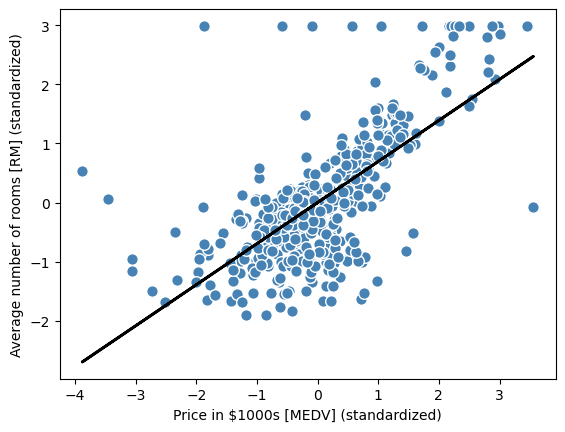

In [11]:
lin_regplot(X_std, y_std, model)
plt.ylabel('Average number of rooms [RM] (standardized)')
plt.xlabel('Price in $1000s [MEDV] (standardized)')
plt.show()

i think it is acceptable but it need more effort...

In [12]:
# example of predicting with previous linear model

num_rooms_std = sc_x.transform(np.array([[5.0]]))
predicted_std_y = model.predict(num_rooms_std)
print(f"price in 1000$ : {sc_y.inverse_transform([predicted_std_y]).item()}")

price in 1000$ : 10.839932888584524


## estimating linear model coefs with sckit-learn 

previous approach was pure. but it can be more suitable to use prepared methods like scikit-learn

In [13]:
from sklearn.linear_model import LinearRegression

slr = LinearRegression()
slr.fit(X, y)

y_pred = slr.predict(X)

print('Slope: ', slr.coef_[0])
print('Intercept: ', slr.intercept_)

Slope:  9.10210898118031
Intercept:  -34.67062077643857


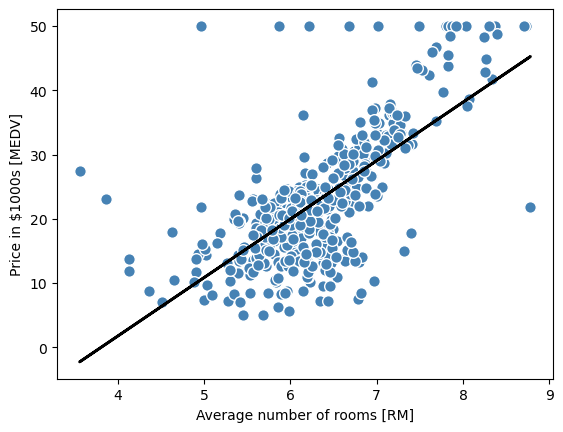

In [14]:
lin_regplot(X, y, slr)
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000s [MEDV]')
plt.show()

Is is obvious that how much it is easy! I recommend it

# make regression more robust via RANSAC 

sometimes there are some outliers in our data. and sometimes we can't recognize them. RANSAC or RANdom SAmple Consensus is a robust method that fits
a regression model to a subset of the data, the so-called inliers. in this method we are not forced to think carefully about outliers.

this algorithm is as follows:

1. Select a random number of examples to be inliers and fit the model.
2. Test all other data points against the fitted model and add those points that fall within a user-given tolerance to the inliers.
3. Refit the model using all inliers.
4. Estimate the error of the fitted model versus the inliers.
5. Terminate the algorithm if the performance meets a certain user-defined threshold or if a fixed number of iterations were reached; go back to step 1otherwise.

In [15]:
# applying RANSAC regression

from sklearn.linear_model import RANSACRegressor

ransac = RANSACRegressor(estimator=LinearRegression(), min_samples=50,
                         residual_threshold=5.0, max_trials=100, loss='absolute_error', random_state=0)

##### >>> by default sckit learn choos residual_threshold via calculating MAD which is stand for median absolute deviation

ransac.fit(X, y)

RANSACRegressor(estimator=LinearRegression(), min_samples=50, random_state=0,
                residual_threshold=5.0)

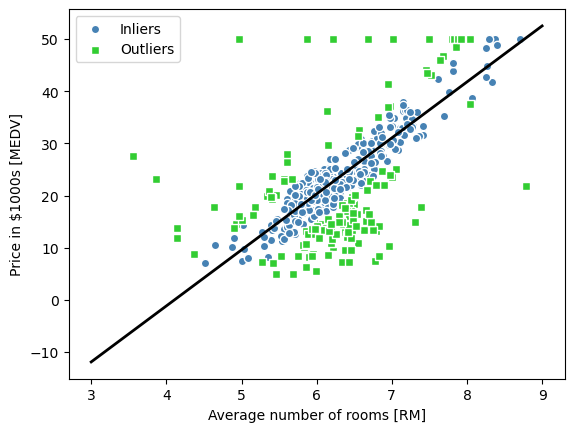

In [16]:
# visualizing

inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

line_x = np.arange(3, 10, 1)
line_y_ransac = ransac.predict(line_x[:, np.newaxis])

plt.scatter(X[inlier_mask], y[inlier_mask], c='steelblue',
            edgecolors='white', marker='o', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask], c='limegreen',
            edgecolor='white', marker='s', label='Outliers')

plt.plot(line_x, line_y_ransac, color='black', lw=2)

plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000s [MEDV]')
plt.legend(loc='upper left')

plt.show()

In [17]:
print('RANSAC slope: ', ransac.estimator_.coef_[0])
print('RANSAC intercept: ', ransac.estimator_.intercept_)

RANSAC slope:  10.73450880847928
RANSAC intercept:  -44.08906428639814


### but we dont know that our model is good or not --> we should evaluate it!

In [18]:
# splitting train and test 

from sklearn.model_selection import train_test_split
X = df.iloc[:, :-1]
y = df['MEDV']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

slr = LinearRegression()

slr.fit(X_train, y_train)

y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

we can use many evaluation metrics but the most useful of them for regression models are as follows:
- MSE (Maen Squared Error)
- Residual plots
- R2 score -- coefficient of determination

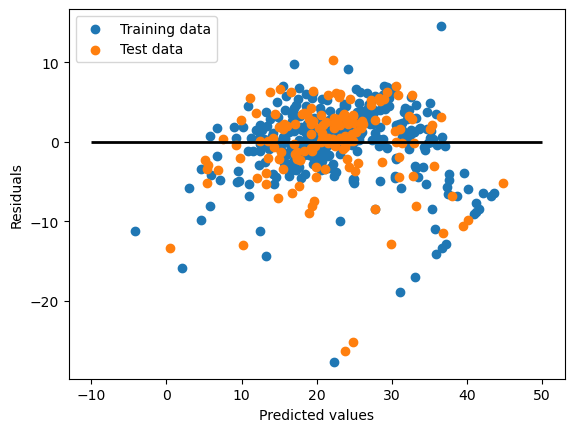

In [19]:
# Residual plots

plt.scatter(y_train_pred, y_train_pred - y_train, label='Training data')
plt.scatter(y_test_pred, y_test_pred - y_test, label='Test data')

plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)

plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')

plt.show()

remember: if residual are located normally(normal distribution) around center line, we can say that our model is good

In [20]:
# Mean Squared Error

from sklearn.metrics import mean_squared_error

print("train data MSE: ", mean_squared_error(y_train, y_train_pred))
print("test data MSE: ", mean_squared_error(y_test, y_test_pred))

train data MSE:  19.958219814238046
test data MSE:  27.195965766883273


In [21]:
# R2 score ----> this score is better than MSE but it need more calculation (not in scikit learn!)

from sklearn.metrics import r2_score

print('r2 score of train data: ', r2_score(y_train, y_train_pred))
print('r2 score of test data: ', r2_score(y_test, y_test_pred))

r2 score of train data:  0.7645451026942549
r2 score of test data:  0.6733825506400188


i can just say: thats not too bad. but not good :/

# How about regularized regression?!

most popular regularized regressions:

- Ridge regression ---> adding squared sum of the weights
- LASSO (least absolute shrinkage and selection operator) ---> adding sum of the absolute magnitudes of the model weights
- elastic Net ---> combination of ridge and LASSO

In [22]:
# these are the same (for writing codes and fit and evaluation), so i dont apply them

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

ridge = Ridge(alpha=0.1)
lasso = Lasso(alpha=0.1)
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)

# Introduction to polynomial regression

In [23]:
# new data (just for learning...)

X = np.array([258.0, 270.0, 294.0, 320.0, 342.0, 368.0,
             396.0, 446.0, 480.0, 586.0])[:, np.newaxis]
y = np.array([236.4, 234.4, 252.8, 298.6, 314.2,
             342.2, 360.8, 368.0, 391.2, 390.8])


# regression
from sklearn.preprocessing import PolynomialFeatures

lr = LinearRegression()
pr = LinearRegression()
quadratic = PolynomialFeatures(degree=2)

X_quad = quadratic.fit_transform(X)

lr.fit(X, y)

X_fit = np.arange(250, 600, 10)[:, np.newaxis]
y_lin_fit = lr.predict(X_fit)

pr.fit(X_quad, y)
y_quad_fit = pr.predict(quadratic.fit_transform(X_fit))

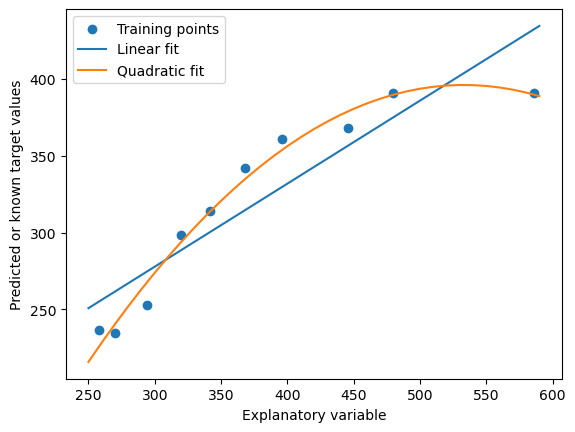

In [24]:
plt.scatter(X, y, label='Training points')
plt.plot(X_fit, y_lin_fit, label='Linear fit')
plt.plot(X_fit, y_quad_fit, label='Quadratic fit')
plt.xlabel('Explanatory variable')
plt.ylabel('Predicted or known target values')

plt.legend(loc='upper left')

In [25]:
# evaluation

y_pred_lin = lr.predict(X)
y_pred_quad = pr.predict(X_quad)

print("MSE of linear model: ", mean_squared_error(y, y_pred_lin))
print("MSE of quadratic model: ", mean_squared_error(y, y_pred_quad))
print("R2 score of linear model: ", r2_score(y, y_pred_lin))
print("R2 score of quadratic model: ", r2_score(y, y_pred_quad))

MSE of linear model:  569.7796663183207
MSE of quadratic model:  61.330214517447715
R2 score of linear model:  0.8317053837891232
R2 score of quadratic model:  0.9818850241163604


In [26]:
# applying regression to our dataset

X = df[['LSTAT']].values
y = df['MEDV'].values

X_fit = np.arange(X.min(), X.max(), 1)[:, np.newaxis]


lr = LinearRegression()
quad = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)


lr = lr.fit(X, y)
y_lin_fit = lr.predict(X_fit)
lin_r2_score = r2_score(y, lr.predict(X))


lr = lr.fit(quad.fit_transform(X), y)
y_quad_fit = lr.predict(quad.fit_transform(X_fit))
quad_r2_score = r2_score(y, lr.predict(quad.fit_transform(X)))

lr = lr.fit(cubic.fit_transform(X), y)
y_cubic_fit = lr.predict(cubic.fit_transform(X_fit))
cubic_r2_score = r2_score(y, lr.predict(cubic.fit_transform(X)))

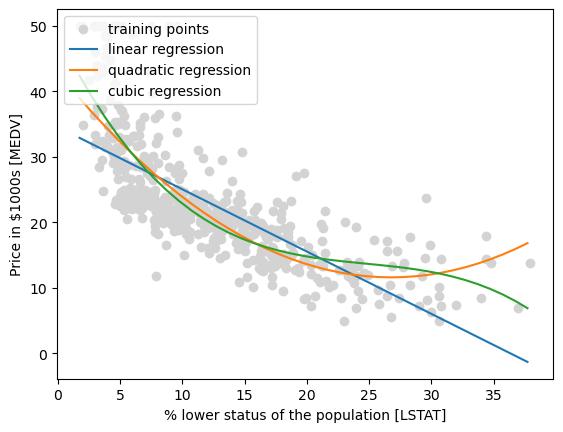

In [27]:
# visualizing

plt.scatter(X, y, label='training points', color='lightgray')
plt.plot(X_fit, y_lin_fit, label='linear regression')
plt.plot(X_fit, y_quad_fit, label='quadratic regression')
plt.plot(X_fit, y_cubic_fit, label="cubic regression")
plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000s [MEDV]')
plt.legend(loc='upper left')

In [28]:
print("linear ---> r2_score: ", lin_r2_score)
print("quad ---> r2_score: ", quad_r2_score)
print("cubic ---> r2_score: ", cubic_r2_score)

linear ---> r2_score:  0.5441462975864799
quad ---> r2_score:  0.6407168971636611
cubic ---> r2_score:  0.657847640589572


### how about another models like log and exponentioal???

In [29]:
X_log = np.log(X)
y_sqrt = np.sqrt(y)


reg = LinearRegression()
reg.fit(X_log, y_sqrt)

X_fit = np.arange(X_log.min()-1, X_log.max()+1, 1)[:, np.newaxis]

y_new_fit = reg.predict(X_fit)

non_linear_r2 = r2_score(y_sqrt, reg.predict(X_log))

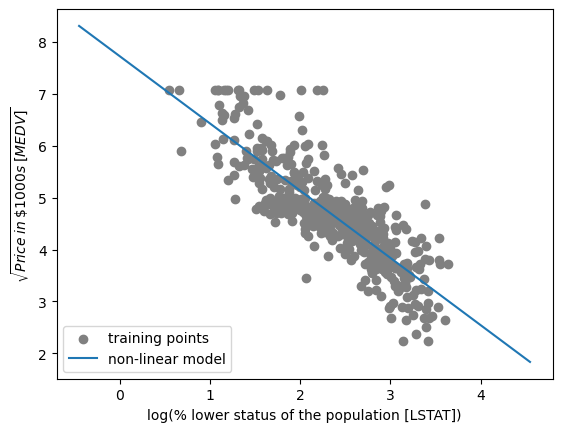

In [30]:
# visualizing 


plt.scatter(X_log, y_sqrt, label="training points", color="gray")
plt.plot(X_fit, y_new_fit, label="non-linear model")
plt.xlabel('log(% lower status of the population [LSTAT])')
plt.ylabel('$\sqrt{Price \; in \; \$1000s \; [MEDV]}$')
plt.legend(loc='lower left')

In [31]:
print("r2_score of this non-linear model: ", non_linear_r2)

r2_score of this non-linear model:  0.6909284798971007


# regression with decision trees

we can do regression with decesion trees.

Text(0, 0.5, 'Price in $1000s [MEDV]')

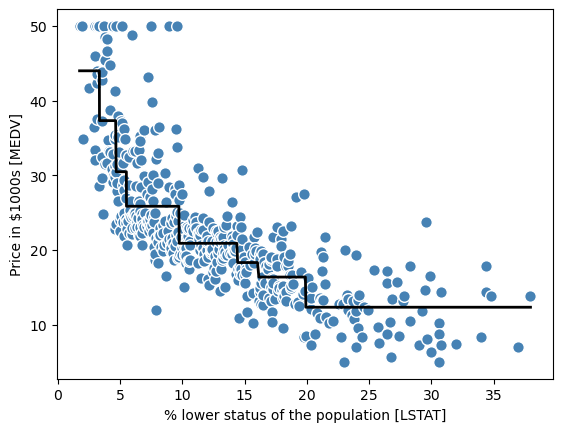

In [32]:
from sklearn.tree import DecisionTreeRegressor

X = df[['LSTAT']].values
y = df['MEDV'].values


tree = DecisionTreeRegressor(max_depth=3)

tree.fit(X, y)

sort_idx = X.flatten().argsort()

lin_regplot(X[sort_idx], y[sort_idx], tree)
plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000s [MEDV]')

# random forest regression

random forest as you know is more robust than single decsion tree. so we are going to you it in our poblem.

And about diffrences between decision tree regressor and decision tree classifier we can say : The only difference is that we use the MSE criterion to grow the individual decision trees (for regression), and the predicted target variable is calculated as the average prediction over all decision trees.

In [36]:
# random forest

from sklearn.ensemble import RandomForestRegressor

X = df.iloc[:, :-1].values
y = df['MEDV'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=1)


forest = RandomForestRegressor(
    n_estimators=1000, criterion='squared_error', random_state=1, n_jobs=-1)

forest.fit(X_train, y_train)

y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

print("MSE of train data: ", mean_squared_error(y_train, y_train_pred))
print("MSE of test data: ", mean_squared_error(y_test, y_test_pred))

print("R2 score of train data: ", r2_score(y_train, y_train_pred))
print("R2 score of test data: ", r2_score(y_test, y_test_pred))

MSE of train data:  1.6436227042243663
MSE of test data:  11.085384101576372
R2 score of train data:  0.9794626907930438
R2 score of test data:  0.8772555925989014


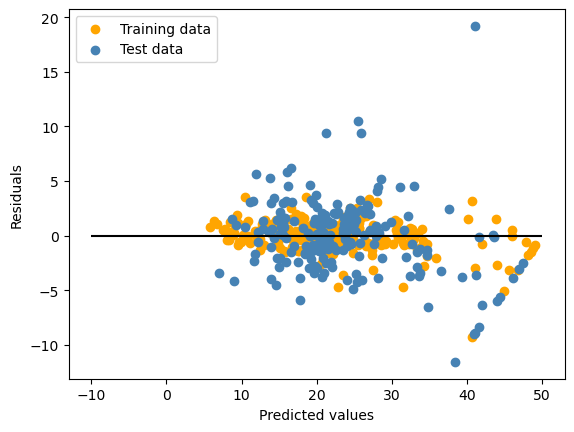

In [45]:
# visualizing residuals of the prediction

plt.scatter(y_train_pred, y_train_pred - y_train, label='Training data', color='orange')
plt.scatter(y_test_pred, y_test_pred - y_test, label='Test data', color='steelblue')
plt.hlines(y=0, xmin=-10, xmax=50, color='black')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')